In [14]:
from helpers import *

In [15]:
df = pd.read_csv('../../DATAHUB/cca_06262025.csv')
df['DATE'] = pd.to_datetime(df['DATE'])

df

,DATE,COUNT,TOTAL_SALES,TICKER_CODE
0,2013-01-01,20,73761,2138
1,2013-01-01,12,85905,2157
2,2013-01-01,2,4070,2193
3,2013-01-01,35,120393,2211
4,2013-01-01,2,6000,2267
...,...,...,...,...
1107795,2026-03-31,3364,11895353,4478
1107796,2026-04-30,1724,5072281,3994
1107797,2026-04-30,1695,5980035,4478
1107798,2026-05-31,39,149150,3994


In [16]:
# データ読み込みとフィルタリング
df_filtered = filter_data_cca(df)

df_filtered

original data: 1107800
filtered data: 1012775


,DATE,COUNT,TOTAL_SALES,TICKER_CODE
0,2013-01-01,20,73761,2138
1,2013-01-01,12,85905,2157
2,2013-01-01,2,4070,2193
3,2013-01-01,35,120393,2211
4,2013-01-01,2,6000,2267
...,...,...,...,...
1107771,2025-06-08,15,79110,9842
1107772,2025-06-08,738,4968883,9843
1107773,2025-06-08,4,31999,9974
1107776,2025-06-30,17057,51054219,3994


In [17]:
df_monthly = daily_to_monthly(df_filtered, 'TOTAL_SALES')
df_monthly

original data: 1012775
monthly data: 34937


,MONTH,TICKER_CODE,TOTAL_SALES
0,2013-01,2138,985151
1,2013-01,2157,1377478
2,2013-01,2193,2924974
3,2013-01,2211,2521892
4,2013-01,2267,238000
...,...,...,...
34932,2025-05,9974,327291989
34933,2025-05,9983,1720150602
34934,2025-05,9984,4053911322
34935,2025-05,9989,403450209


In [18]:
df_yoy = calculate_yoy(df_monthly, 'TOTAL_SALES')
df_yoy

original data: 34937
yoy data: 32077


,MONTH,TICKER_CODE,TOTAL_SALES,YOY
2677,2014-01,2138,3470893,3.523209
2678,2014-01,2157,2673437,1.940820
2679,2014-01,2193,4141117,1.415779
2680,2014-01,2211,2872552,1.139046
2681,2014-01,2267,240100,1.008824
...,...,...,...,...
34932,2025-05,9974,327291989,1.143396
34933,2025-05,9983,1720150602,1.116378
34934,2025-05,9984,4053911322,0.663956
34935,2025-05,9989,403450209,1.143850


In [19]:
# price dataの読み込み
# price_data = pd.read_csv('../../DATAHUB/price_data_with_dividends_from_yfinance_06262025.csv')
# price_data = pd.read_csv('../../DATAHUB/new_price_data.csv')
price_data = pd.read_csv('../data/price_data.csv')
price_data

,Unnamed: 0,DATE,TICKER_CODE,PRICE,DIVIDENDS,MONTHLY_RETURN
0,0,2013-01,2138,923.174316,0.0,NaN
1,1,2013-02,2138,1558.038574,0.0,0.687697
2,2,2013-03,2138,1587.160767,15.0,0.028319
3,3,2013-04,2138,1977.104126,0.0,0.245686
4,4,2013-05,2138,3473.158691,0.0,0.756690
...,...,...,...,...,...,...
30499,30499,2025-02,5032,2811.156250,0.0,-0.110972
30500,30500,2025-03,5032,3201.704834,0.0,0.138928
30501,30501,2025-04,5032,3667.587646,32.5,0.155662
30502,30502,2025-05,5032,3950.000000,0.0,0.077002


In [20]:
# percentiles = [10, 25, 40, 100]

multiple_portfolios = create_multiple_portfolios(df_yoy, price_data, percentiles=[20, 100])
multiple_portfolios

上位20%のポートフォリオを作成中...
ポートフォリオ銘柄数: 48
ポートフォリオに含まれた銘柄: ['2193' '2764' '2782' '2929' '3050' '3091' '3148' '3397' '3543' '3561'
 '3563' '3926' '3994' '4344' '4478' '4479' '4751' '5032' '6071' '6952'
 '7110' '7550' '7564' '7581' '7606' '7618' '7806' '7816' '7840' '7936'
 '7974' '8008' '8022' '8153' '8167' '8252' '8273' '9022' '9338' '9424'
 '9438' '9601' '9605' '9684' '9861' '9873' '9900' '9945']
上位100%のポートフォリオを作成中...
ポートフォリオ銘柄数: 238
ポートフォリオに含まれた銘柄: ['2138' '2157' '2193' '2211' '2267' '2331' '2371' '2432' '2484' '2651'
 '2659' '2670' '2678' '2681' '2685' '2695' '2726' '2730' '2742' '2752'
 '2764' '2780' '2782' '2790' '2792' '2798' '2910' '2928' '2929' '2930'
 '2931' '3028' '3038' '3046' '3048' '3050' '3053' '3064' '3087' '3088'
 '3091' '3092' '3093' '3097' '3098' '3099' '3148' '3179' '3180' '3182'
 '3191' '3197' '3222' '3333' '3341' '3349' '3359' '3382' '3387' '3391'
 '3395' '3397' '3539' '3542' '3543' '3549' '3558' '3561' '3563' '3608'
 '3632' '3635' '3659' '3660' '3665' '3765' '3926' '3938

,top_20p,top_100p
MONTH,,
2014-01,0.022949,-0.012956
2014-02,-0.019785,-0.012028
2014-03,0.045536,0.028539
2014-04,-0.003686,-0.007002
2014-05,0.016617,0.029559
...,...,...
2025-01,0.000508,0.015408
2025-02,-0.017286,-0.020038
2025-03,0.024991,0.020226


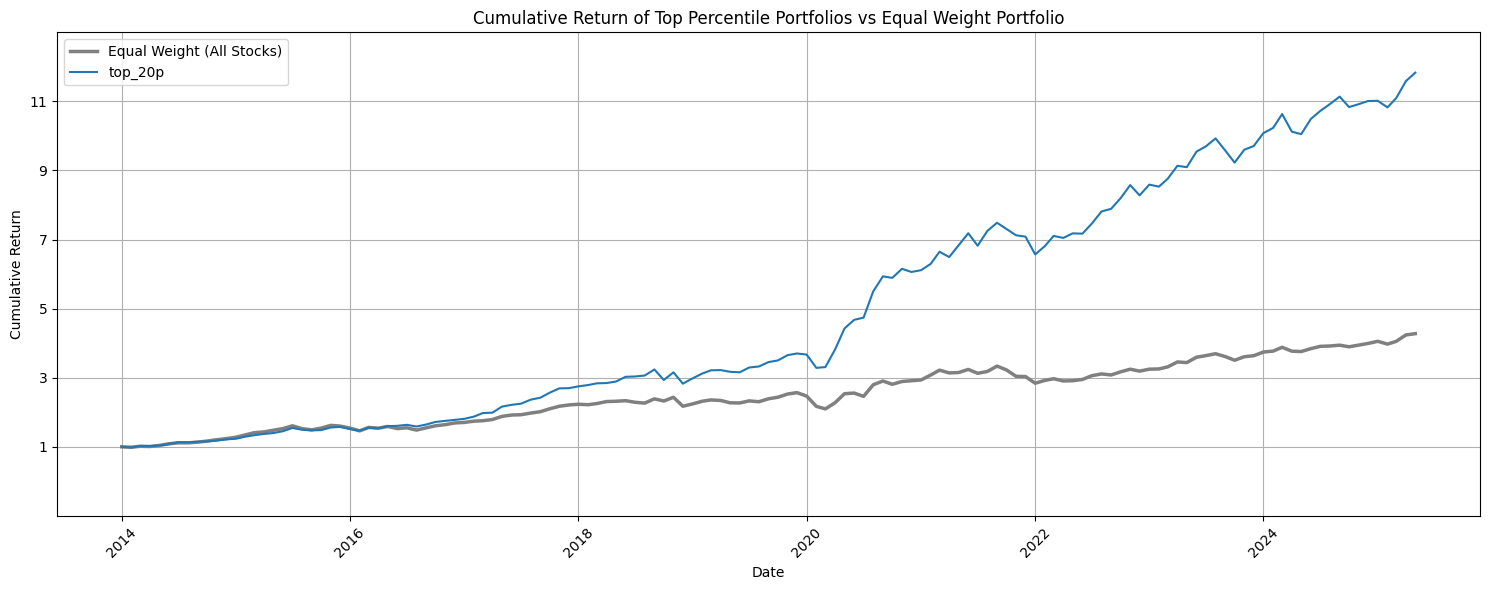

In [21]:
# set date index
multiple_portfolios.index = pd.to_datetime(multiple_portfolios.index)

# 可視化
plot_portfolio_returns(multiple_portfolios)

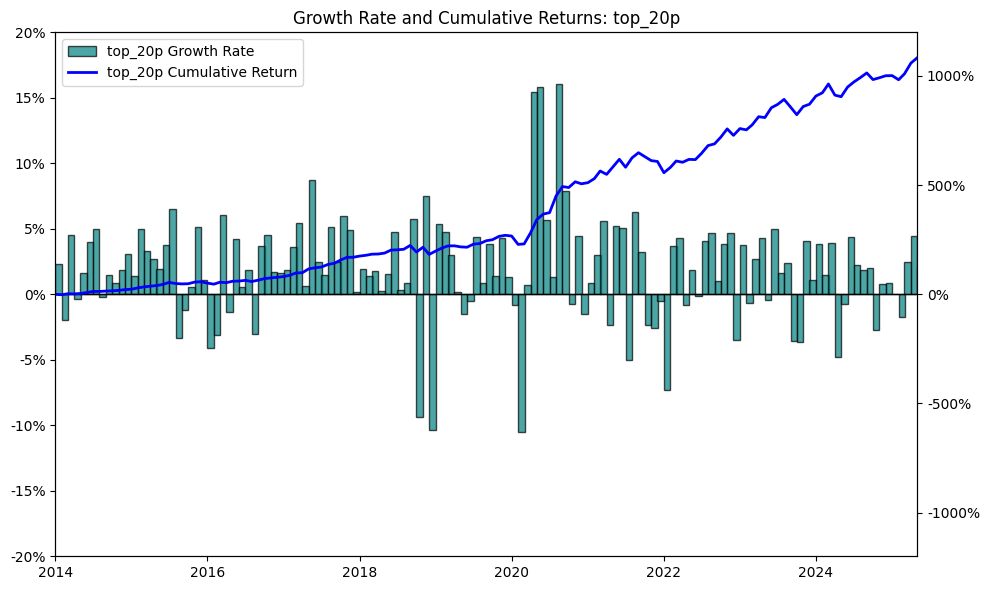

In [22]:
plot_growth_rate(multiple_portfolios, 'top_20p')

In [23]:
# パフォーマンス指標計算
print("パフォーマンス指標を計算中...")
performance_metrics = calculate_performance_metrics(multiple_portfolios)

print("\n=== パフォーマンス指標 ===")
print(performance_metrics.round(2))


パフォーマンス指標を計算中...

=== パフォーマンス指標 ===
          Total Return (%)  Annual Return (%)  Monthly Return (%)  \
top_20p            1110.45              24.41                1.91   
top_100p            322.08              13.44                1.12   

          Annual Volatility (%)  Monthly Volatility (%)  Sharpe Ratio  \
top_20p                   13.68                    3.95          1.78   
top_100p                  11.93                    3.44          1.13   

          Max Drawdown (%)  Win Rate (%)  
top_20p             -12.68         75.18  
top_100p            -18.34         69.34  


In [24]:
# 月次統計計算
print("\n=== 月次リターンの詳細統計 ===")
monthly_stats = calculate_monthly_statistics(multiple_portfolios)
print(monthly_stats.round(2))



=== 月次リターンの詳細統計 ===
          月次平均リターン (%)  月次ボラティリティ (%)  最小月次リターン (%)  最大月次リターン (%)  中央値 (%)
top_20p           1.91           3.95        -10.48         16.08     1.85
top_100p          1.12           3.44        -12.06         13.68     1.62


In [25]:
# 最終累積リターン計算
print("\n=== 最終累積リターン ===")
final_returns = calculate_final_returns(multiple_portfolios)
print(final_returns.to_string(index=False))



=== 最終累積リターン ===
Portfolio  Final Return
  top_20p         12.10
 top_100p          4.22


In [26]:
# 分析結果サマリー
generate_analysis_summary(multiple_portfolios, df_yoy, performance_metrics)


=== 分析結果サマリー ===
分析期間: 2014-01-01 00:00:00 から 2025-05-01 00:00:00
対象銘柄数: 238
分析したポートフォリオ: ['top_20p', 'top_100p']

最高パフォーマンス: top_20p (1110.45%)
最低パフォーマンス: top_100p (322.08%)

最高シャープレシオ: top_20p (1.78)
最低最大ドローダウン: top_100p (-18.34%)

=== パーセンタイルポートフォリオ間の比較 ===
最高パーセンタイル: top_20p (1110.45%)
最低パーセンタイル: top_100p (322.08%)
